In [21]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [20]:
# 19세 이상 인구 데이터 예시 (엑셀에서 실제 컬럼명이 있는 줄이 2번째(1번 인덱스)라면)
성인인구_df = pd.read_excel(
    "data/2025_3_19세 이상 인구.xlsx",
    skiprows=1,      # 실제 컬럼명이 있는 줄 바로 위까지 건너뜀 (숫자 조정 필요)
    header=0         # 컬럼명이 있는 줄의 인덱스
)

# 데이터 확인
print(성인인구_df.head())
print(성인인구_df.columns)

  Unnamed: 0 Unnamed: 1     인구수     구성비      성비  인구수.1   구성비.1    성비.1  인구수.2  \
0      합   계          계  87,297  100.00  104.51  9,535  100.00  112.55  3,698   
1        NaN          남  44,611  100.00     NaN  5,049  100.00     NaN  1,945   
2        NaN          여  42,686  100.00     NaN  4,486  100.00     NaN  1,753   
3        19세          계     556    0.64  114.67     44    0.46   91.30     17   
4        NaN          남     297    0.67     NaN     21    0.42     NaN     10   

    구성비.2  ...   성비.13 인구수.14  구성비.14   성비.14 인구수.15  구성비.15   성비.15 인구수.16  \
0  100.00  ...  101.33  4,066  100.00  105.25  8,194   100.0   94.68  3,430   
1  100.00  ...     NaN  2,085  100.00     NaN  3,985   100.0     NaN  1,891   
2  100.00  ...     NaN  1,981  100.00     NaN  4,209   100.0     NaN  1,539   
3    0.46  ...   89.74     21    0.52   75.00     74     0.9  117.65     12   
4    0.51  ...     NaN      9    0.43     NaN     40     1.0     NaN      6   

   구성비.16   성비.16  
0  100.00  122.87 

In [49]:
# 실제 데이터가 시작되는 행 번호에 맞게 skiprows 조정 필요
df = pd.read_excel("data/2025_3_19세 이상 인구.xlsx")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   연령           93 non-null     object
 1   성별           277 non-null    object
 2   금호읍          277 non-null    object
 3   Unnamed: 3   276 non-null    object
 4   Unnamed: 4   277 non-null    object
 5   청통면          277 non-null    object
 6   Unnamed: 6   277 non-null    object
 7   신녕면          277 non-null    object
 8   Unnamed: 8   277 non-null    object
 9   화산면          277 non-null    object
 10  Unnamed: 10  277 non-null    object
 11  화북면          277 non-null    object
 12  Unnamed: 12  277 non-null    object
 13  화남면          277 non-null    object
 14  Unnamed: 14  277 non-null    object
 15  자양면          277 non-null    object
 16  Unnamed: 16  277 non-null    object
 17  임고면          277 non-null    object
 18  Unnamed: 18  277 non-null    object
 19  고경면          277 non-null    

,연령,성별,금호읍,Unnamed: 3,Unnamed: 4,청통면,Unnamed: 6,신녕면,Unnamed: 8,화산면,Unnamed: 10,화북면,Unnamed: 12,화남면,Unnamed: 14,자양면,Unnamed: 16,임고면,Unnamed: 18,고경면,Unnamed: 20,북안면,Unnamed: 22,대창면,Unnamed: 24,동부동,Unnamed: 26,중앙동,Unnamed: 28,서부동,Unnamed: 30,완산동,Unnamed: 32,남부동
0,연령,성별,인구수,NaN,인구수,청통면,인구수,구성비,인구수,구성비,인구수,구성비,인구수,구성비,인구수,구성비,인구수,구성비,인구수,구성비,인구수,구성비,인구수,구성비,인구수,구성비,인구수,구성비,인구수,구성비,인구수,구성비,인구수,구성비
1,19세,계,44,금호읍,17,청통면,13,0.40,4,0.14,8,0.39,9,0.30,4,0.32,17,0.44,17,0.33,17,0.41,7,0.25,218,0.97,74,0.98,21,0.52,74,0.90,12,0.35
2,NaN,남,21,금호읍,10,청통면,8,0.49,3,0.2,4,0.39,7,0.45,1,0.15,11,0.55,9,0.31,12,0.54,4,0.27,117,1.07,35,0.92,9,0.43,40,1.00,6,0.32
3,NaN,여,23,금호읍,7,청통면,5,0.30,1,0.07,4,0.39,2,0.14,3,0.51,6,0.32,8,0.34,5,0.26,3,0.23,101,0.88,39,1.04,12,0.61,34,0.81,6,0.39
4,20세,계,42,금호읍,16,청통면,12,0.37,2,0.07,4,0.19,11,0.37,2,0.16,14,0.36,23,0.44,15,0.36,12,0.43,213,0.95,75,0.99,24,0.59,81,0.99,9,0.26


In [50]:
# 연령 컬럼의 NaN을 바로 위 값으로 채우기
df['연령'] = df['연령'].fillna(method='ffill')

In [53]:
df.head()

,연령,성별,금호읍,Unnamed: 3,Unnamed: 4,청통면,Unnamed: 6,신녕면,Unnamed: 8,화산면,Unnamed: 10,화북면,Unnamed: 12,화남면,Unnamed: 14,자양면,Unnamed: 16,임고면,Unnamed: 18,고경면,Unnamed: 20,북안면,Unnamed: 22,대창면,Unnamed: 24,동부동,Unnamed: 26,중앙동,Unnamed: 28,서부동,Unnamed: 30,완산동,Unnamed: 32,남부동
0,연령,성별,인구수,NaN,인구수,청통면,인구수,구성비,인구수,구성비,인구수,구성비,인구수,구성비,인구수,구성비,인구수,구성비,인구수,구성비,인구수,구성비,인구수,구성비,인구수,구성비,인구수,구성비,인구수,구성비,인구수,구성비,인구수,구성비
1,19세,계,44,금호읍,17,청통면,13,0.40,4,0.14,8,0.39,9,0.30,4,0.32,17,0.44,17,0.33,17,0.41,7,0.25,218,0.97,74,0.98,21,0.52,74,0.90,12,0.35
2,19세,남,21,금호읍,10,청통면,8,0.49,3,0.2,4,0.39,7,0.45,1,0.15,11,0.55,9,0.31,12,0.54,4,0.27,117,1.07,35,0.92,9,0.43,40,1.00,6,0.32
3,19세,여,23,금호읍,7,청통면,5,0.30,1,0.07,4,0.39,2,0.14,3,0.51,6,0.32,8,0.34,5,0.26,3,0.23,101,0.88,39,1.04,12,0.61,34,0.81,6,0.39
4,20세,계,42,금호읍,16,청통면,12,0.37,2,0.07,4,0.19,11,0.37,2,0.16,14,0.36,23,0.44,15,0.36,12,0.43,213,0.95,75,0.99,24,0.59,81,0.99,9,0.26


In [54]:
# 성별 컬럼에서 '계'인 행 삭제
df = df[df['성별'] != '계']
df.head()

,연령,성별,금호읍,Unnamed: 3,Unnamed: 4,청통면,Unnamed: 6,신녕면,Unnamed: 8,화산면,Unnamed: 10,화북면,Unnamed: 12,화남면,Unnamed: 14,자양면,Unnamed: 16,임고면,Unnamed: 18,고경면,Unnamed: 20,북안면,Unnamed: 22,대창면,Unnamed: 24,동부동,Unnamed: 26,중앙동,Unnamed: 28,서부동,Unnamed: 30,완산동,Unnamed: 32,남부동
0,연령,성별,인구수,NaN,인구수,청통면,인구수,구성비,인구수,구성비,인구수,구성비,인구수,구성비,인구수,구성비,인구수,구성비,인구수,구성비,인구수,구성비,인구수,구성비,인구수,구성비,인구수,구성비,인구수,구성비,인구수,구성비,인구수,구성비
2,19세,남,21,금호읍,10,청통면,8,0.49,3,0.2,4,0.39,7,0.45,1,0.15,11,0.55,9,0.31,12,0.54,4,0.27,117,1.07,35,0.92,9,0.43,40,1.00,6,0.32
3,19세,여,23,금호읍,7,청통면,5,0.30,1,0.07,4,0.39,2,0.14,3,0.51,6,0.32,8,0.34,5,0.26,3,0.23,101,0.88,39,1.04,12,0.61,34,0.81,6,0.39
5,20세,남,26,금호읍,10,청통면,5,0.31,2,0.13,2,0.20,8,0.51,1,0.15,11,0.55,14,0.49,11,0.50,7,0.47,115,1.05,43,1.13,10,0.48,42,1.05,8,0.42
6,20세,여,16,금호읍,6,청통면,7,0.42,0,0.00,2,0.19,3,0.21,1,0.17,3,0.16,9,0.39,4,0.21,5,0.38,98,0.85,32,0.85,14,0.71,39,0.93,1,0.06


In [55]:
# 엑셀로 저장 (index 없이)
df.to_excel("정제된_19세이상인구.xlsx", index=False)

In [59]:
df.head()

,연령,성별,금호읍,Unnamed: 3,Unnamed: 4,청통면,Unnamed: 6,신녕면,Unnamed: 8,화산면,Unnamed: 10,화북면,Unnamed: 12,화남면,Unnamed: 14,자양면,Unnamed: 16,임고면,Unnamed: 18,고경면,Unnamed: 20,북안면,Unnamed: 22,대창면,Unnamed: 24,동부동,Unnamed: 26,중앙동,Unnamed: 28,서부동,Unnamed: 30,완산동,Unnamed: 32,남부동
0,연령,성별,인구수,NaN,금호읍,청통면,인구수,청통면,인구수,구성비,신녕면,구성비,인구수,화산면,인구수,구성비,화북면,구성비,인구수,화남면,인구수,구성비,자양면,구성비,인구수,임고면,인구수,구성비,고경면,구성비,인구수,북안면,인구수,구성비
2,19세,남,21,금호읍,금호읍,청통면,인구수,0.49,인구수,0.2,신녕면,0.39,인구수,0.45,인구수,0.15,화북면,0.55,인구수,0.31,인구수,0.54,자양면,0.27,인구수,1.07,인구수,0.92,고경면,0.43,인구수,1.00,인구수,0.32
3,19세,여,23,금호읍,금호읍,청통면,인구수,0.30,인구수,0.07,신녕면,0.39,인구수,0.14,인구수,0.51,화북면,0.32,인구수,0.34,인구수,0.26,자양면,0.23,인구수,0.88,인구수,1.04,고경면,0.61,인구수,0.81,인구수,0.39
5,20세,남,26,금호읍,금호읍,청통면,인구수,0.31,인구수,0.13,신녕면,0.20,인구수,0.51,인구수,0.15,화북면,0.55,인구수,0.49,인구수,0.50,자양면,0.47,인구수,1.05,인구수,1.13,고경면,0.48,인구수,1.05,인구수,0.42
6,20세,여,16,금호읍,금호읍,청통면,인구수,0.42,인구수,0.00,신녕면,0.19,인구수,0.21,인구수,0.17,화북면,0.16,인구수,0.39,인구수,0.21,자양면,0.38,인구수,0.85,인구수,0.85,고경면,0.71,인구수,0.93,인구수,0.06


In [65]:
df = pd.read_excel("정제된_19세이상인구.xlsx")
df.head()

,연령,성별,금호읍,Unnamed: 3,Unnamed: 4,청통면,Unnamed: 6,신녕면,Unnamed: 8,화산면,Unnamed: 10,화북면,Unnamed: 12,화남면,Unnamed: 14,자양면,Unnamed: 16,임고면,Unnamed: 18,고경면,Unnamed: 20,북안면,Unnamed: 22,대창면,Unnamed: 24,동부동,Unnamed: 26,중앙동,Unnamed: 28,서부동,Unnamed: 30,완산동,Unnamed: 32,남부동
0,연령,성별,인구수,NaN,인구수,청통면,인구수,신녕면,인구수,화산면,인구수,화북면,인구수,화남면,인구수,자양면,인구수,임고면,인구수,고경면,인구수,북안면,인구수,대창면,인구수,동부동,인구수,중앙동,인구수,서부동,인구수,완산동,인구수,남부동
1,19세,남,21,금호읍,10,청통면,8,0.49,3,0.2,4,0.39,7,0.45,1,0.15,11,0.55,9,0.31,12,0.54,4,0.27,117,1.07,35,0.92,9,0.43,40,1.00,6,0.32
2,19세,여,23,금호읍,7,청통면,5,0.30,1,0.07,4,0.39,2,0.14,3,0.51,6,0.32,8,0.34,5,0.26,3,0.23,101,0.88,39,1.04,12,0.61,34,0.81,6,0.39
3,20세,남,26,금호읍,10,청통면,5,0.31,2,0.13,2,0.20,8,0.51,1,0.15,11,0.55,14,0.49,11,0.50,7,0.47,115,1.05,43,1.13,10,0.48,42,1.05,8,0.42
4,20세,여,16,금호읍,6,청통면,7,0.42,0,0.00,2,0.19,3,0.21,1,0.17,3,0.16,9,0.39,4,0.21,5,0.38,98,0.85,32,0.85,14,0.71,39,0.93,1,0.06


In [66]:
# 5열부터 2열 간격으로 있는 열들의 첫 행 데이터를 아래로 채우기
for col in range(7, len(df.columns), 2):  # 5열(인덱스 4)부터 2열 간격으로
    first_value = df.iloc[0, col]  # 첫 행의 값
    df.iloc[1:, col] = first_value  # 두 번째 행부터 첫 행의 값으로 채우기

# 결과 확인
print("데이터 수정 후:")
df.head()

데이터 수정 후:


,연령,성별,금호읍,Unnamed: 3,Unnamed: 4,청통면,Unnamed: 6,신녕면,Unnamed: 8,화산면,Unnamed: 10,화북면,Unnamed: 12,화남면,Unnamed: 14,자양면,Unnamed: 16,임고면,Unnamed: 18,고경면,Unnamed: 20,북안면,Unnamed: 22,대창면,Unnamed: 24,동부동,Unnamed: 26,중앙동,Unnamed: 28,서부동,Unnamed: 30,완산동,Unnamed: 32,남부동
0,연령,성별,인구수,NaN,인구수,청통면,인구수,신녕면,인구수,화산면,인구수,화북면,인구수,화남면,인구수,자양면,인구수,임고면,인구수,고경면,인구수,북안면,인구수,대창면,인구수,동부동,인구수,중앙동,인구수,서부동,인구수,완산동,인구수,남부동
1,19세,남,21,금호읍,10,청통면,8,신녕면,3,화산면,4,화북면,7,화남면,1,자양면,11,임고면,9,고경면,12,북안면,4,대창면,117,동부동,35,중앙동,9,서부동,40,완산동,6,남부동
2,19세,여,23,금호읍,7,청통면,5,신녕면,1,화산면,4,화북면,2,화남면,3,자양면,6,임고면,8,고경면,5,북안면,3,대창면,101,동부동,39,중앙동,12,서부동,34,완산동,6,남부동
3,20세,남,26,금호읍,10,청통면,5,신녕면,2,화산면,2,화북면,8,화남면,1,자양면,11,임고면,14,고경면,11,북안면,7,대창면,115,동부동,43,중앙동,10,서부동,42,완산동,8,남부동
4,20세,여,16,금호읍,6,청통면,7,신녕면,0,화산면,2,화북면,3,화남면,1,자양면,3,임고면,9,고경면,4,북안면,5,대창면,98,동부동,32,중앙동,14,서부동,39,완산동,1,남부동


In [69]:
df = pd.read_excel("정제된_19세이상인구.xlsx")
df.head()

,연령,성별,인구수,지역,인구수.1,청통면,인구수.2,신녕면,인구수.3,화산면,인구수.4,화북면,인구수.5,화남면,인구수.6,자양면,인구수.7,임고면,인구수.8,고경면,인구수.9,북안면,인구수.10,대창면,인구수.11,동부동,인구수.12,중앙동,인구수.13,서부동,인구수.14,완산동,인구수.15,남부동
0,19세,남,21,금호읍,10,청통면,8,신녕면,3,화산면,4,화북면,7,화남면,1,자양면,11,임고면,9,고경면,12,북안면,4,대창면,117,동부동,35,중앙동,9,서부동,40,완산동,6,남부동
1,19세,여,23,금호읍,7,청통면,5,신녕면,1,화산면,4,화북면,2,화남면,3,자양면,6,임고면,8,고경면,5,북안면,3,대창면,101,동부동,39,중앙동,12,서부동,34,완산동,6,남부동
2,20세,남,26,금호읍,10,청통면,5,신녕면,2,화산면,2,화북면,8,화남면,1,자양면,11,임고면,14,고경면,11,북안면,7,대창면,115,동부동,43,중앙동,10,서부동,42,완산동,8,남부동
3,20세,여,16,금호읍,6,청통면,7,신녕면,0,화산면,2,화북면,3,화남면,1,자양면,3,임고면,9,고경면,4,북안면,5,대창면,98,동부동,32,중앙동,14,서부동,39,완산동,1,남부동
4,21세,남,35,금호읍,5,청통면,14,신녕면,7,화산면,5,화북면,2,화남면,2,자양면,10,임고면,66,고경면,7,북안면,7,대창면,126,동부동,49,중앙동,18,서부동,24,완산동,18,남부동


In [70]:
# wide-form에서 long-form으로 변환
melted_df = pd.melt(
    df,
    id_vars=['연령', '성별'],
    value_vars=[col for col in df.columns if '인구수' in col],
    var_name='지역',
    value_name='인구수'
)

# 지역명 매핑
region_mapping = {
    '인구수': '금호읍',
    '인구수.1': '청통면',
    '인구수.2': '신녕면',
    '인구수.3': '화산면',
    '인구수.4': '화북면',
    '인구수.5': '화남면',
    '인구수.6': '자양면',
    '인구수.7': '임고면',
    '인구수.8': '고경면',
    '인구수.9': '북안면',
    '인구수.10': '대창면',
    '인구수.11': '동부동',
    '인구수.12': '중앙동',
    '인구수.13': '서부동',
    '인구수.14': '완산동',
    '인구수.15': '남부동'
}

# 지역명 변환
melted_df['지역'] = melted_df['지역'].map(region_mapping)

# 결과 확인
print("\n변환된 데이터 형태:")
print(melted_df.head())
print("\n데이터 크기:", melted_df.shape)


변환된 데이터 형태:
    연령 성별   지역  인구수
0  19세  남  금호읍   21
1  19세  여  금호읍   23
2  20세  남  금호읍   26
3  20세  여  금호읍   16
4  21세  남  금호읍   35

데이터 크기: (2944, 4)


C:\Users\Owner\AppData\Local\Temp\ipykernel_30732\3172010387.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  melted_df = pd.melt(


In [82]:
melted_df.to_excel("refind_19세이상인구.xlsx", index=False)

In [75]:
melted_df.info()
melted_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연령      2944 non-null   object
 1   성별      2944 non-null   object
 2   지역      2944 non-null   object
 3   인구수     2944 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 92.1+ KB


,연령,성별,지역,인구수
0,19세,남,금호읍,21
1,19세,여,금호읍,23
2,20세,남,금호읍,26
3,20세,여,금호읍,16
4,21세,남,금호읍,35


In [77]:
melted_df["인구수"].describe()

count    2944.000000
mean       29.652514
std        40.228077
min         0.000000
25%         4.000000
50%        17.000000
75%        40.000000
max       288.000000
Name: 인구수, dtype: float64

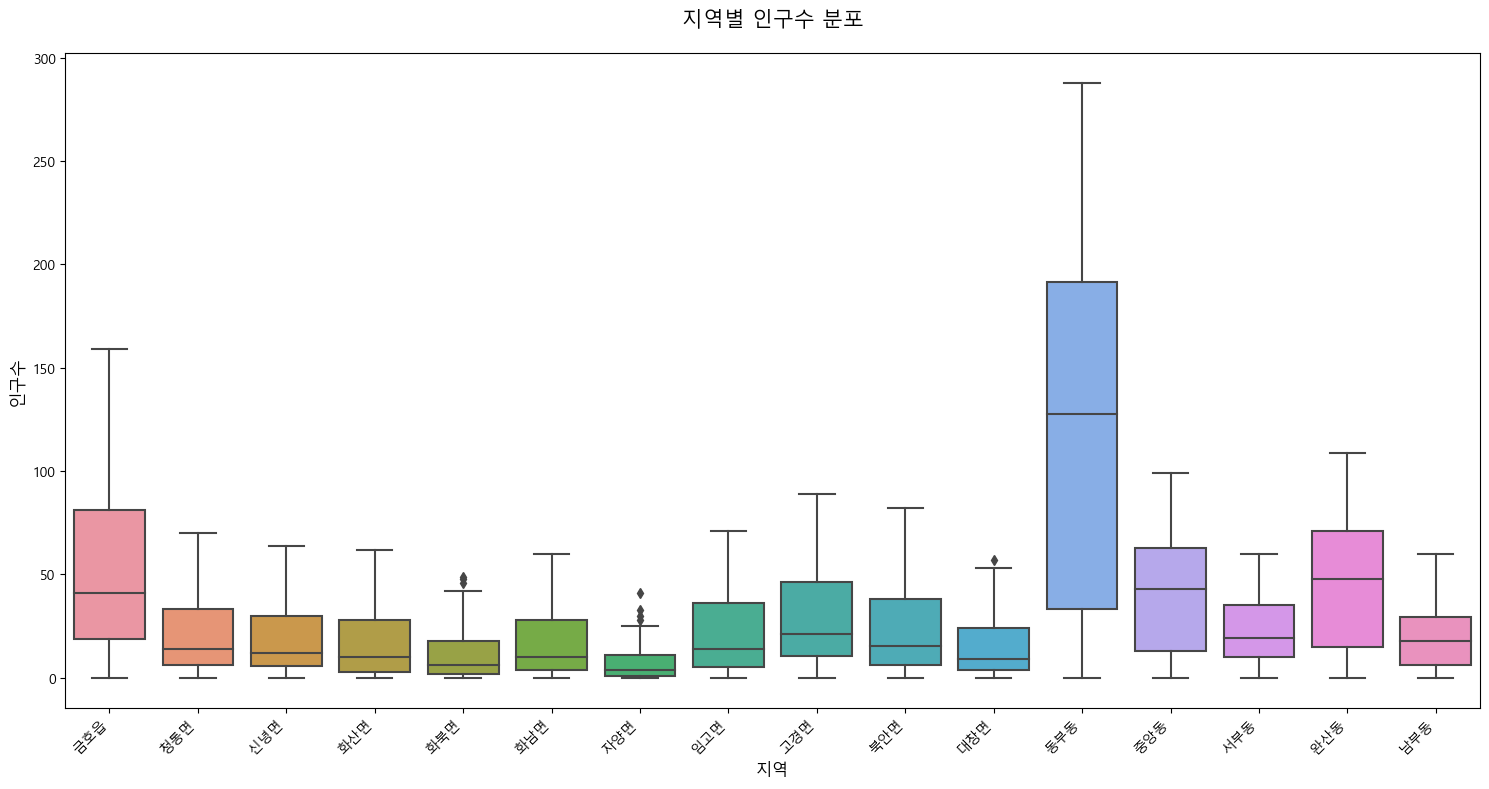


지역별 기술통계량:
     count        mean        std  min    25%    50%     75%    max
지역                                                                 
고경면  184.0   28.222826  22.927525  0.0  10.75   21.0   46.25   89.0
금호읍  184.0   51.820652  42.885225  0.0  18.75   41.0   81.25  159.0
남부동  184.0   18.641304  14.540376  0.0   6.00   18.0   29.25   60.0
대창면  184.0   15.271739  14.689577  0.0   4.00    9.0   24.25   57.0
동부동  184.0  121.641304  87.972062  0.0  33.25  127.5  191.50  288.0
북안면  184.0   22.413043  20.578599  0.0   6.00   15.5   38.25   82.0
서부동  184.0   22.097826  16.832222  0.0  10.00   19.5   35.25   60.0
신녕면  184.0   17.853261  16.451458  0.0   5.75   12.0   30.00   64.0
완산동  184.0   44.532609  31.364925  0.0  15.00   48.0   71.00  109.0
임고면  184.0   21.000000  19.289851  0.0   5.00   14.0   36.00   71.0
자양면  184.0    6.760870   7.569524  0.0   1.00    4.0   11.25   41.0
중앙동  184.0   41.076087  28.172084  0.0  13.00   43.0   63.00   99.0
청통면  184.0   20.097826  18.167141  0

In [79]:
# 박스플롯으로 지역별 나이 분포 시각화
plt.figure(figsize=(15, 8))
sns.boxplot(data=melted_df, x='지역', y='인구수')

# 그래프 꾸미기
plt.title('지역별 인구수 분포', fontsize=15, pad=20)
plt.xlabel('지역', fontsize=12)
plt.ylabel('인구수', fontsize=12)

# x축 레이블 회전
plt.xticks(rotation=45, ha='right')

# 여백 조정
plt.tight_layout()

# 그래프 표시
plt.show()

# 지역별 기술통계량 출력
print("\n지역별 기술통계량:")
print(melted_df.groupby('지역')['인구수'].describe())

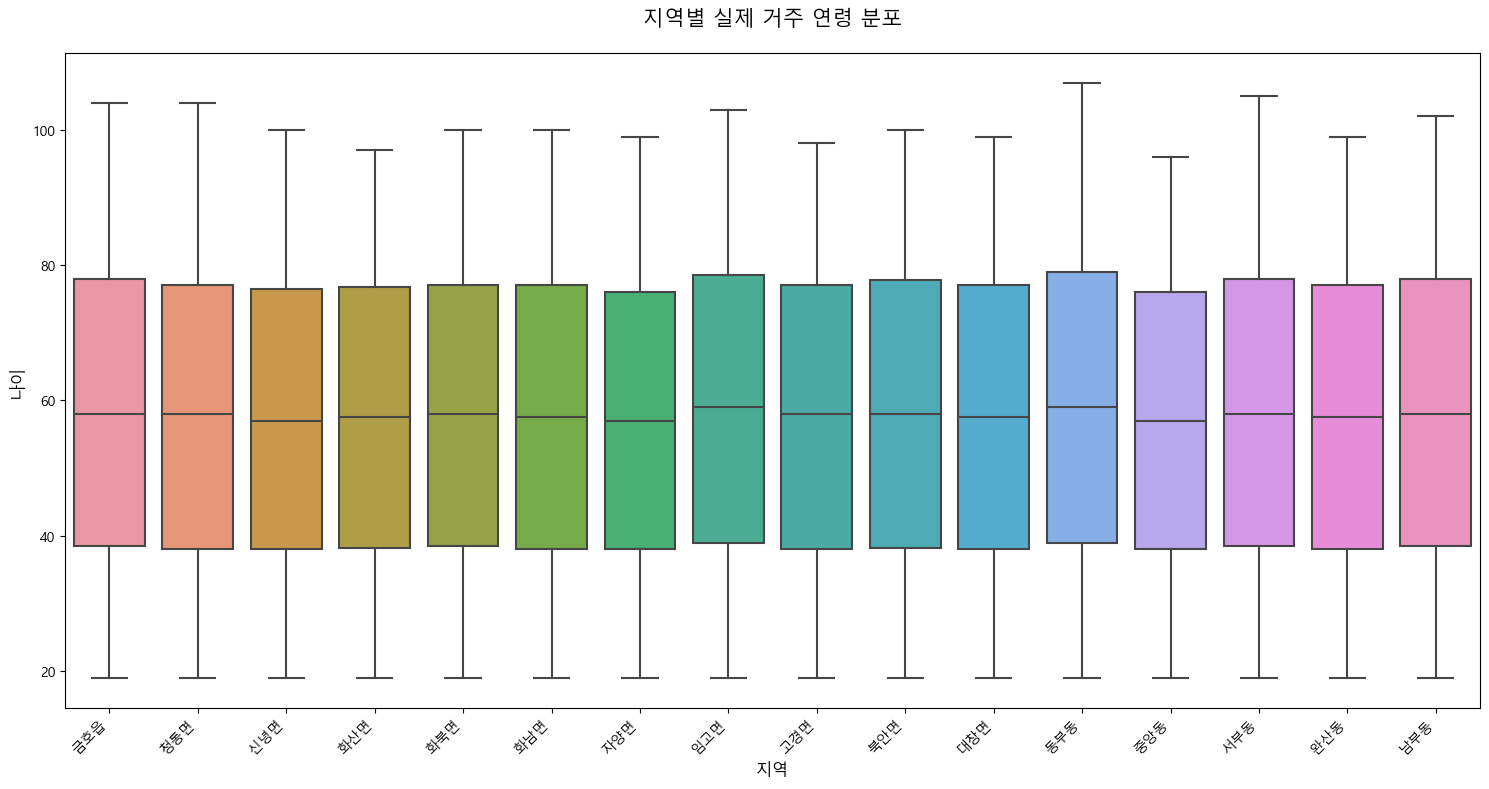


지역별 나이 기술통계량 (인구수 > 0):
     count       mean        std   min    25%   50%    75%    max
지역                                                               
고경면  157.0  57.770701  22.767181  19.0  38.00  58.0  77.00   98.0
금호읍  159.0  58.295597  23.104209  19.0  38.50  58.0  78.00  104.0
남부동  159.0  58.314465  23.134756  19.0  38.50  58.0  78.00  102.0
대창면  156.0  57.557692  22.683870  19.0  38.00  57.5  77.00   99.0
동부동  161.0  58.857143  23.501558  19.0  39.00  59.0  79.00  107.0
북안면  158.0  58.044304  22.953108  19.0  38.25  58.0  77.75  100.0
서부동  159.0  58.352201  23.206595  19.0  38.50  58.0  78.00  105.0
신녕면  155.0  57.316129  22.560382  19.0  38.00  57.0  76.50  100.0
완산동  156.0  57.551282  22.675920  19.0  38.00  57.5  77.00   99.0
임고면  159.0  58.773585  23.112527  19.0  39.00  59.0  78.50  103.0
자양면  149.0  57.134228  22.131565  19.0  38.00  57.0  76.00   99.0
중앙동  154.0  57.006494  22.309908  19.0  38.00  57.0  76.00   96.0
청통면  157.0  57.853503  22.916184  19.0  38.00  58.0

In [84]:
# 인구수가 0보다 큰 데이터만 선택
melted_df_filtered = melted_df[melted_df['인구수'] > 0]

# 박스플롯으로 지역별 나이 분포 시각화
plt.figure(figsize=(15, 8))
sns.boxplot(data=melted_df_filtered, x='지역', y='나이')

# 그래프 꾸미기
plt.title('지역별 실제 거주 연령 분포', fontsize=15, pad=20)
plt.xlabel('지역', fontsize=12)
plt.ylabel('나이', fontsize=12)

# x축 레이블 회전
plt.xticks(rotation=45, ha='right')

# 여백 조정
plt.tight_layout()

# 그래프 표시
plt.show()

# 지역별 나이 기술통계량 출력
print("\n지역별 나이 기술통계량 (인구수 > 0):")
print(melted_df_filtered.groupby('지역')['나이'].describe())

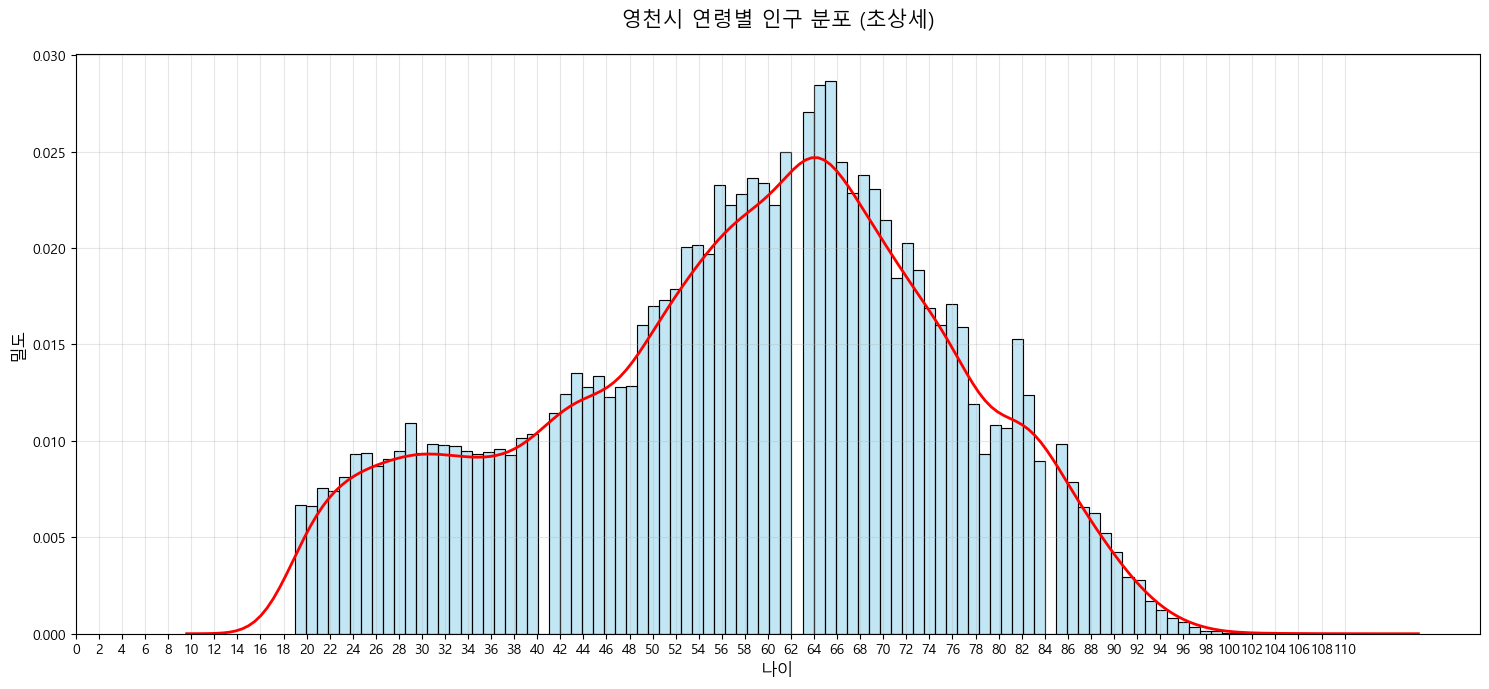


영천시 연령별 인구 기술통계량:
count     88.000000
mean      62.511364
std       25.567128
min       19.000000
25%       40.750000
50%       62.500000
75%       84.250000
max      107.000000
Name: 나이, dtype: float64

전체 인구수: 87,297명


In [87]:
# 전체 인구수 합산
total_population = melted_df[melted_df['인구수'] > 0]['인구수'].sum()

# 연령별 인구수 합산
age_distribution = melted_df[melted_df['인구수'] > 0].groupby('나이')['인구수'].sum().reset_index()

# 그래프 생성
plt.figure(figsize=(15, 7))

# 히스토그램과 KDE 플롯 (더 세밀한 조정)
sns.histplot(data=age_distribution, x='나이', weights='인구수', bins=92, 
            stat='density', alpha=0.5, color='skyblue')
sns.kdeplot(data=age_distribution, x='나이', weights='인구수', color='red', 
            linewidth=2, bw_adjust=0.3)  # bandwidth를 0.3로 더 조정

# 그래프 꾸미기
plt.title('영천시 연령별 인구 분포 (초상세)', fontsize=15, pad=20)
plt.xlabel('나이', fontsize=12)
plt.ylabel('밀도', fontsize=12)

# x축 눈금 간격 조정 (2살 단위)
plt.xticks(range(0, 111, 2))

# 그리드 추가
plt.grid(True, alpha=0.3)

# 여백 조정
plt.tight_layout()

# 그래프 표시
plt.show()

# 기술통계량 출력
print("\n영천시 연령별 인구 기술통계량:")
print(age_distribution['나이'].describe())

# 전체 인구수 출력
print(f"\n전체 인구수: {total_population:,}명")

In [88]:
# 특정 연령대의 인구수 확인
target_ages = [40, 41, 62, 63, 82, 83, 84, 85, 86]
age_counts = age_distribution[age_distribution['나이'].isin(target_ages)]

print("\n특정 연령대 인구수:")
print(age_counts.sort_values('나이'))

# 전체 데이터에서 해당 연령대의 원본 데이터도 확인
print("\n원본 데이터에서 해당 연령대 확인:")
print(melted_df[melted_df['나이'].isin(target_ages)].sort_values('나이'))


특정 연령대 인구수:
    나이   인구수
21  40   864
22  41   954
43  62  2087
44  63  2258
63  82  1275
64  83  1035
65  84   746
66  85   823
67  86   657

원본 데이터에서 해당 연령대 확인:
       연령 성별   지역  인구수  나이
42    40세  남  금호읍   40  40
1699  40세  여  북안면    4  40
594   40세  남  화산면   10  40
1515  40세  여  고경면   15  40
1514  40세  남  고경면   14  40
2802  40세  남  남부동   19  40
2803  40세  여  남부동   11  40
1331  40세  여  임고면   10  40
1882  40세  남  대창면   12  40
410   40세  남  신녕면    6  40
1330  40세  남  임고면   10  40
1147  40세  여  자양면    6  40
1146  40세  남  자양면    5  40
963   40세  여  화남면   11  40
962   40세  남  화남면   15  40
779   40세  여  화북면    6  40
778   40세  남  화북면    6  40
411   40세  여  신녕면    9  40
1883  40세  여  대창면    5  40
1698  40세  남  북안면   21  40
2435  40세  여  서부동    7  40
43    40세  여  금호읍   28  40
2619  40세  여  완산동   52  40
2618  40세  남  완산동   66  40
227   40세  여  청통면    6  40
2434  40세  남  서부동   26  40
2251  40세  여  중앙동   40  40
2250  40세  남  중앙동   53  40
595   40세  여  화산면    7  40
2067  40세  여  동부동  158  40

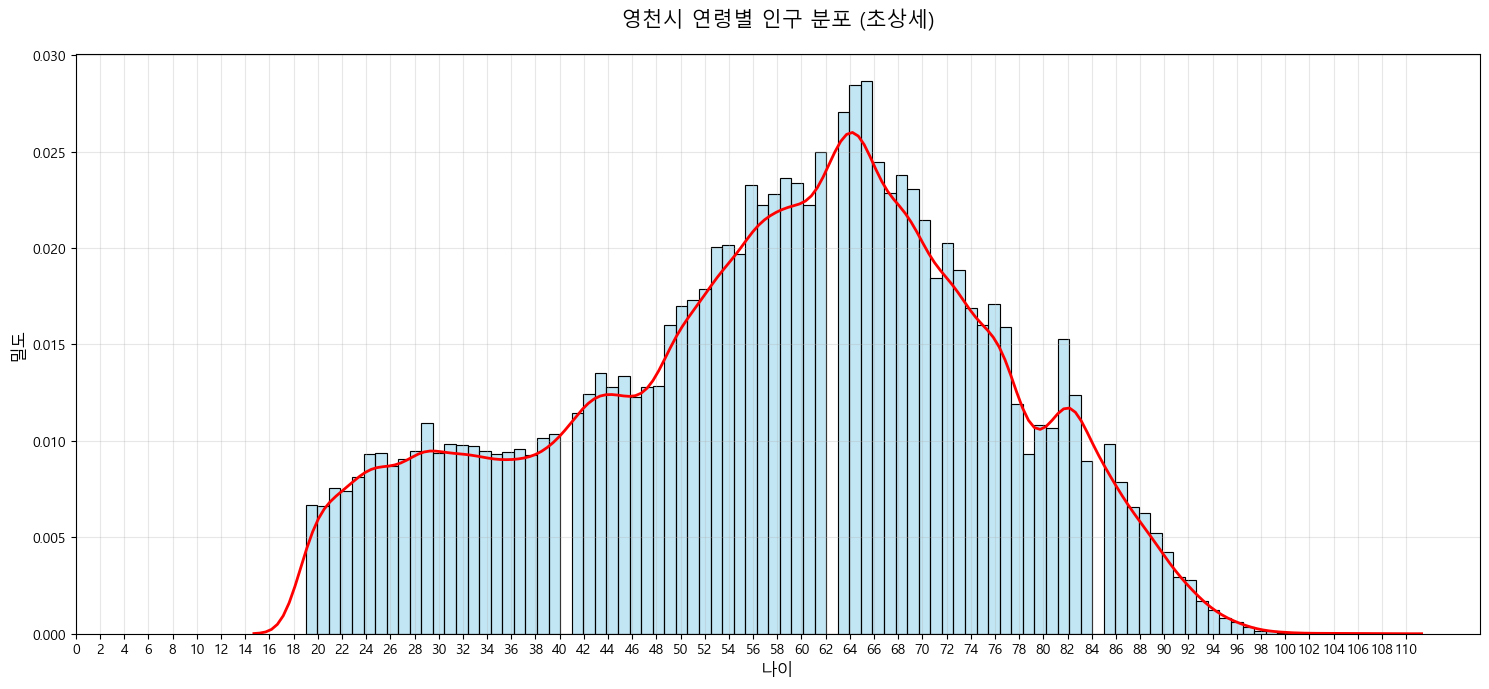


특정 연령대 인구수:
나이
40     864
41     954
62    2087
63    2258
82    1275
83    1035
84     746
85     823
86     657
Name: 인구수, dtype: int64


In [89]:
# 그래프 생성
plt.figure(figsize=(15, 7))

# 원본 데이터에서 인구수가 0보다 큰 경우만 선택
population_data = melted_df[melted_df['인구수'] > 0]

# 히스토그램과 KDE 플롯
sns.histplot(data=population_data, x='나이', weights='인구수', bins=92, 
            stat='density', alpha=0.5, color='skyblue')
sns.kdeplot(data=population_data, x='나이', weights='인구수', color='red', 
            linewidth=2, bw_adjust=0.3)

# 그래프 꾸미기
plt.title('영천시 연령별 인구 분포 (초상세)', fontsize=15, pad=20)
plt.xlabel('나이', fontsize=12)
plt.ylabel('밀도', fontsize=12)

# x축 눈금 간격 조정 (2살 단위)
plt.xticks(range(0, 111, 2))

# 그리드 추가
plt.grid(True, alpha=0.3)

# 여백 조정
plt.tight_layout()

# 그래프 표시
plt.show()

# 특정 연령대의 인구수 확인
target_ages = [40, 41, 62, 63, 82, 83, 84, 85, 86]
print("\n특정 연령대 인구수:")
print(population_data[population_data['나이'].isin(target_ages)].groupby('나이')['인구수'].sum().sort_index())